In [1]:
! pip install metpy
! pip install holidays
! pip install numpy
! pip install pandas
! pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import numpy as np
import pandas as pd
import holidays
import matplotlib.pyplot as plt
import operator
import pickle
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

The data source: https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather  
The data ranged from 2015 to 2018

In [3]:
df_energy=pd.read_csv("./energy_dataset.csv")
df_weather=pd.read_csv("./weather_features.csv")

In [4]:
df_energy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [5]:
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [6]:
df_weather.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [7]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


For this project, we only extract the following information:
1. Timestamp
2. Weather data from Madrid  
    * Temperature
    * Humidity
3. Actual Power

In [8]:
df=df_weather[df_weather['city_name']=="Madrid"][['dt_iso',"temp","humidity"]].merge(df_energy[['time','total load actual']],left_on="dt_iso",right_on="time",how="outer")

In [9]:
df.head()

,dt_iso,temp,humidity,time,total load actual
0,2015-01-01 00:00:00+01:00,267.325,63,2015-01-01 00:00:00+01:00,25385.0
1,2015-01-01 01:00:00+01:00,267.325,63,2015-01-01 01:00:00+01:00,24382.0
2,2015-01-01 02:00:00+01:00,266.186,64,2015-01-01 02:00:00+01:00,22734.0
3,2015-01-01 03:00:00+01:00,266.186,64,2015-01-01 03:00:00+01:00,21286.0
4,2015-01-01 04:00:00+01:00,266.186,64,2015-01-01 04:00:00+01:00,20264.0


Checking missing data, the total number was small and it was dropped

In [10]:
df.isna().sum()

dt_iso                0
temp                  0
humidity              0
time                  0
total load actual    36
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df = df.drop('dt_iso', axis=1)

In [13]:
df.head()

,temp,humidity,time,total load actual
0,267.325,63,2015-01-01 00:00:00+01:00,25385.0
1,267.325,63,2015-01-01 01:00:00+01:00,24382.0
2,266.186,64,2015-01-01 02:00:00+01:00,22734.0
3,266.186,64,2015-01-01 03:00:00+01:00,21286.0
4,266.186,64,2015-01-01 04:00:00+01:00,20264.0


**Visualization of data**

<Axes: xlabel='time'>

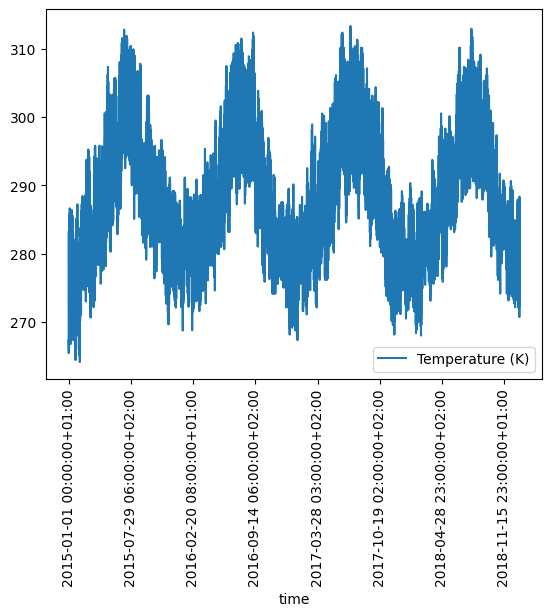

In [49]:
df.plot(x='time', y='temp',rot=90,label = 'Temperature (K)')

<Axes: xlabel='time'>

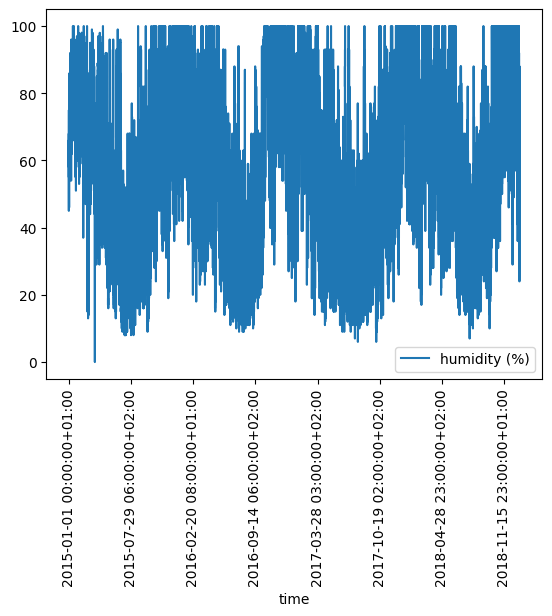

In [50]:
df.plot(x='time', y='humidity' ,rot=90, label = 'humidity (%)')

<Axes: xlabel='time'>

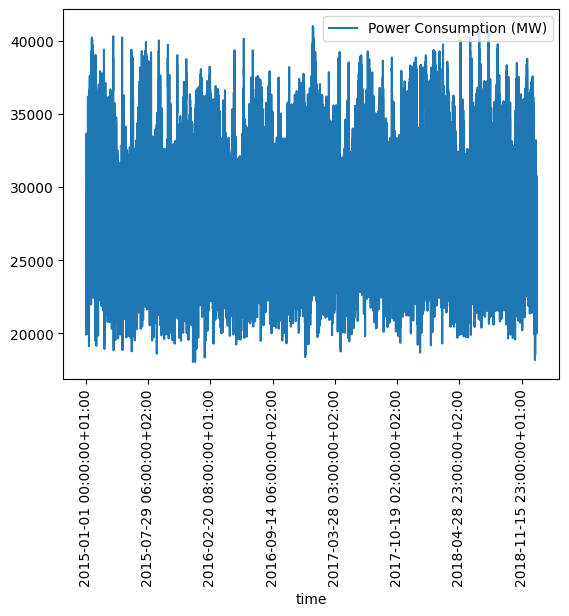

In [52]:
df.plot(x='time', y='total load actual',rot=90, label = 'Power Consumption (MW)')

In [17]:
df_unit_convert = df.copy()
#Convert temperature from K to °C
df_unit_convert['temp']=df_unit_convert['temp'].apply(lambda x: x-273.15)

It was found that 2 record with 0% RH, which is not possible

In [18]:
df_unit_convert[df_unit_convert['humidity']==0]

,temp,humidity,time,total load actual
2116,0.0,0,2015-03-30 05:00:00+02:00,21335.0
2124,0.0,0,2015-03-30 13:00:00+02:00,31578.0


In [19]:
df_unit_convert=df_unit_convert[df_unit_convert['humidity']!=0]

Converting relative humidity to dew point temperature

In [20]:
df_unit_convert['dew_point']=df_unit_convert.apply(lambda row:dewpoint_from_relative_humidity(row['temp'] * units.degC, row['humidity'] * units.percent).magnitude,axis=1)

In [21]:
df_unit_convert.head()

,temp,humidity,time,total load actual,dew_point
0,-5.825,63,2015-01-01 00:00:00+01:00,25385.0,-11.740093
1,-5.825,63,2015-01-01 01:00:00+01:00,24382.0,-11.740093
2,-6.964,64,2015-01-01 02:00:00+01:00,22734.0,-12.628307
3,-6.964,64,2015-01-01 03:00:00+01:00,21286.0,-12.628307
4,-6.964,64,2015-01-01 04:00:00+01:00,20264.0,-12.628307


**Visualization of transformed features**

<Axes: xlabel='time'>

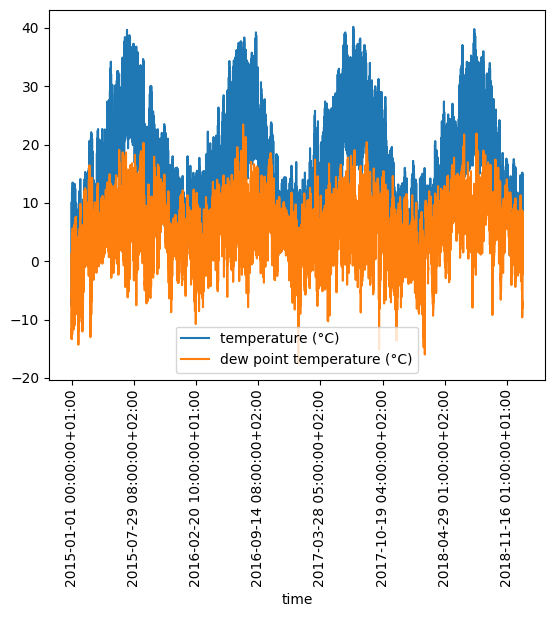

In [54]:
df_unit_convert.plot(x='time', y=['temp','dew_point'],rot=90, label = ["temperature (°C)","dew point temperature (°C)"])

The temperature was binned and the mean were plotted against power consumption. This shows a non-linear relationship

<Axes: xlabel='Temperaute range (°C)', ylabel='Power Consumption (MW)'>

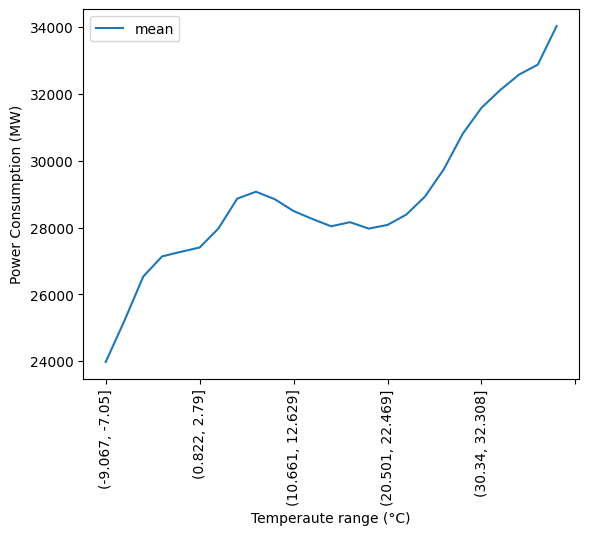

In [58]:
bins = pd.cut(df_unit_convert['temp'], 25)
df_unit_convert.groupby(bins)['total load actual'].agg(['mean']).plot(rot=90, ylabel ="Power Consumption (MW)", xlabel="Temperaute range (°C)")

In [24]:
df_date_feature=df_unit_convert.drop('humidity', axis=1)

In [25]:
df_date_feature['time']=pd.to_datetime(df_date_feature['time'], utc = True, infer_datetime_format= True)
df_date_feature['time']= df_date_feature['time'] + pd.DateOffset(hours=1)

The timestamp was decomposed as the following features:  
1. year
2. month
3. day of week
4. hour of day
5. week of year
6. day of year

In [26]:
df_date_feature['year']=df_date_feature['time'].dt.year
df_date_feature['month']=df_date_feature['time'].dt.month
df_date_feature['weekday']=df_date_feature['time'].dt.weekday
df_date_feature['hour']=df_date_feature['time'].dt.hour
df_date_feature['week']=df_date_feature['time'].dt.weekofyear
df_date_feature['day']=df_date_feature['time'].dt.day

<ipython-input-26-217dc56b5ce6>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_date_feature['week']=df_date_feature['time'].dt.weekofyear


In [27]:
df_date_feature.head()

,temp,time,total load actual,dew_point,year,month,weekday,hour,week,day
0,-5.825,2015-01-01 00:00:00+00:00,25385.0,-11.740093,2015,1,3,0,1,1
1,-5.825,2015-01-01 01:00:00+00:00,24382.0,-11.740093,2015,1,3,1,1,1
2,-6.964,2015-01-01 02:00:00+00:00,22734.0,-12.628307,2015,1,3,2,1,1
3,-6.964,2015-01-01 03:00:00+00:00,21286.0,-12.628307,2015,1,3,3,1,1
4,-6.964,2015-01-01 04:00:00+00:00,20264.0,-12.628307,2015,1,3,4,1,1


Apply cyclic encoding to all the datatime features

In [28]:
df_encoded=df_date_feature.copy()
df_encoded["weekday"]=df_encoded["weekday"].apply(lambda x:x+1)
df_encoded["hour"]=df_encoded["hour"].apply(lambda x:x+1)

df_encoded["month_sin"] = df_encoded["month"].apply(lambda x: np.sin(x / 12 * 2 * np.pi))
df_encoded["month_cos"] = df_encoded["month"].apply(lambda x: np.cos(x / 12 * 2 * np.pi))

df_encoded["weekday_sin"] = df_encoded["weekday"].apply(lambda x: np.sin(x / 7 * 2 * np.pi))
df_encoded["weekday_cos"] = df_encoded["weekday"].apply(lambda x: np.cos(x / 7 * 2 * np.pi))

df_encoded["hour_sin"] = df_encoded["hour"].apply(lambda x: np.sin(x / 24 * 2 * np.pi))
df_encoded["hour_cos"] = df_encoded["hour"].apply(lambda x: np.cos(x / 24 * 2 * np.pi))

df_encoded["week_sin"] = df_encoded["week"].apply(lambda x: np.sin(x / 53 * 2 * np.pi))
df_encoded["week_cos"] = df_encoded["week"].apply(lambda x: np.cos(x / 53 * 2 * np.pi))

df_encoded["day_sin"] = df_encoded["week"].apply(lambda x: np.sin(x / 30 * 2 * np.pi))
df_encoded["day_cos"] = df_encoded["week"].apply(lambda x: np.cos(x / 30 * 2 * np.pi))

Additional boolean feature incidating that day was a holiday or not (including Sunday)

In [29]:
ES_holidays = holidays.country_holidays('ES')
df_encoded['is_holiday']=df_date_feature["time"].apply(lambda x : x in ES_holidays)

In [30]:
df_encoded['is_holiday']=operator.or_(df_encoded['is_holiday'], df_encoded["weekday"].apply(lambda x: x ==7))

In [31]:
df_output=df_encoded.drop(['time','month','weekday','hour','week','day'], axis=1)

In [32]:
df_output.head()

,temp,total load actual,dew_point,year,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos,week_sin,week_cos,day_sin,day_cos,is_holiday
0,-5.825,25385.0,-11.740093,2015,0.5,0.866025,-0.433884,-0.900969,0.258819,0.965926,0.118273,0.992981,0.207912,0.978148,True
1,-5.825,24382.0,-11.740093,2015,0.5,0.866025,-0.433884,-0.900969,0.500000,0.866025,0.118273,0.992981,0.207912,0.978148,True
2,-6.964,22734.0,-12.628307,2015,0.5,0.866025,-0.433884,-0.900969,0.707107,0.707107,0.118273,0.992981,0.207912,0.978148,True
3,-6.964,21286.0,-12.628307,2015,0.5,0.866025,-0.433884,-0.900969,0.866025,0.500000,0.118273,0.992981,0.207912,0.978148,True
4,-6.964,20264.0,-12.628307,2015,0.5,0.866025,-0.433884,-0.900969,0.965926,0.258819,0.118273,0.992981,0.207912,0.978148,True


Split the data into training set & test set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_output.drop(['total load actual'], axis=1).to_numpy(), df_output['total load actual'].to_numpy(), test_size=0.3, random_state=10)

As previously stated, the temperature feature shows a nonlinear relationships with the label. A non-linear regression model is required. Random Forest Regressor was selected for this project

In [34]:
reg = RandomForestRegressor(max_depth=12,random_state=42)

In [35]:
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, random_state=42)

RMSE

In [36]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2119.1018300486976

Feature importance (MDI)

Text(0.5, 0, 'Mean decrease in impurity')

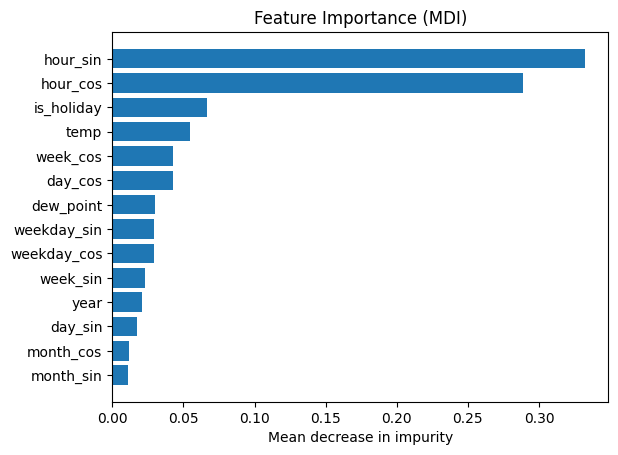

In [37]:
feature_names=df_output.columns.drop("total load actual")
feature_importance = reg.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity")

save the model

In [38]:
with open('model.pkl', 'wb') as f:
  pickle.dump(reg, f)